# South East Accelerometer Data Analysis

In [1]:
from IPython.core.display import display, HTML
display(HTML(r"""<style id=hide>div.input{display:none;}</style><button type="button"onclick="var myStyle = document.getElementById('hide').sheet;myStyle.insertRule('div.input{display:inherit !important;}', 0);">Show inputs</button>"""))

<h1>Importing Dependencies</h1>

In [2]:
## Importing dependencies
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab

from plotly.subplots import make_subplots
from IPython.display import display, Image
from scipy import signal
from scipy.fft import fftshift

* updated from 2020_11_05 notebook

<h1>Accelerometer Information and Placement Information</h1>

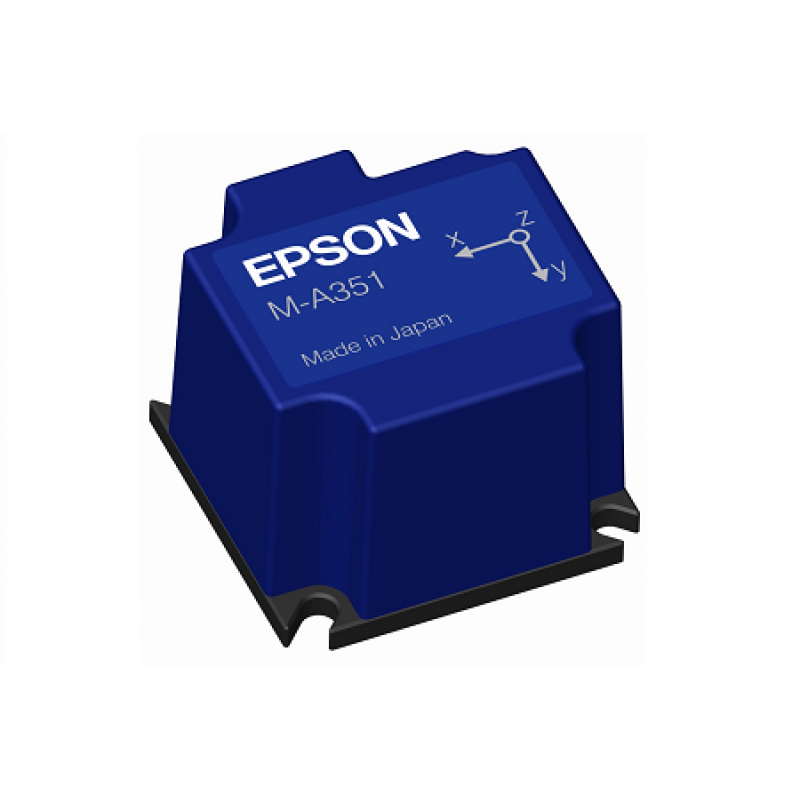

In [3]:
Image(filename='Epson_Acc.png',width=200, height=200)


**Accelerometer 3 (South-East) | Accelerometer Number: 0600**

* X : Pointing out of plane
* Y : Pointing right | SE direction
* Z : Pointing up | NE direction

Please refer to the image below for a visual representation

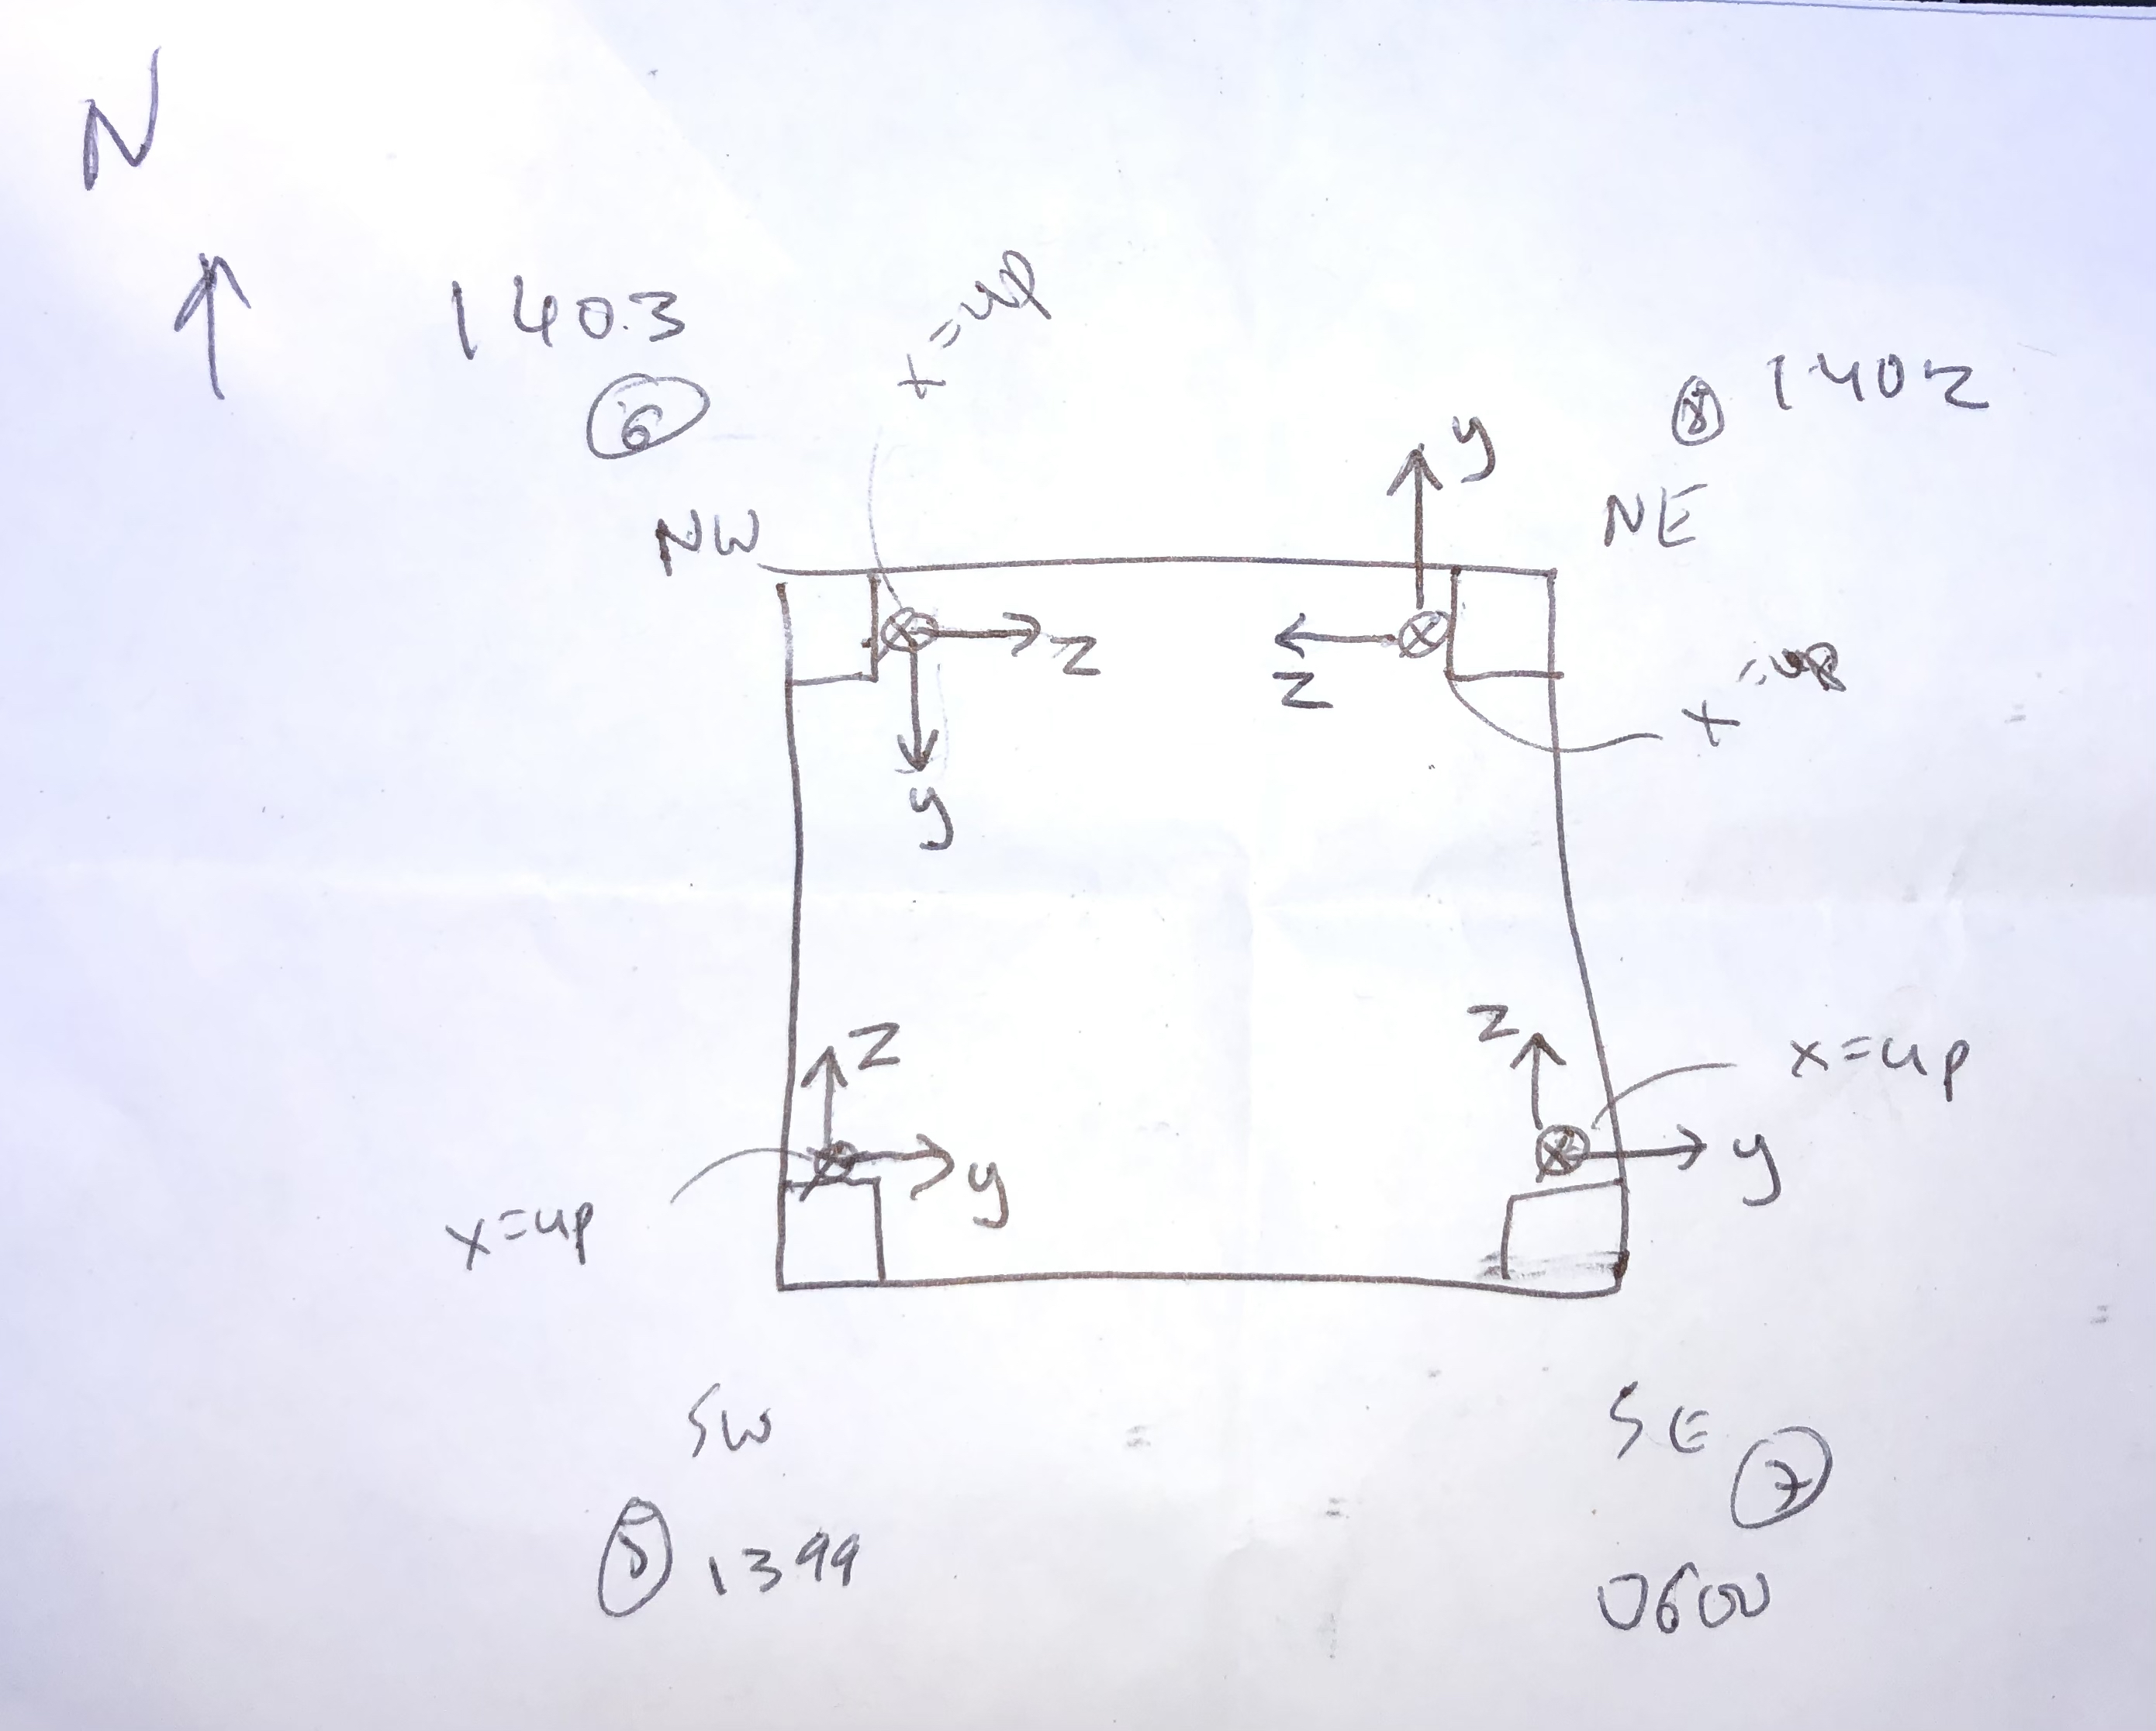

In [4]:
Image(filename='direction_.jpg',width=400, height=400)

## Units Specification

* The acceleration is given as mG which **milli-G**, which is **1/1000 of a G**. G is Earth's gravity.
* Frequency is in **Hz**
* For the Power Spectral Frequency, the power is plotted as **10*log10(𝑃𝑥𝑥) for decibels**. The values of the power are given as **dB/Hz**

<h1> Uploading Full Acceleration Data and Normalization </h1>

In [5]:
se_df_original = pd.read_csv('SouthEast/SE.csv')
se_df_original.head(5)

Sample No.  time[sec]       Ax[mG]     Ay[mG]    Az[mG]   ATotal[mG]  \
0           1      0.000  1002.058327  34.240961 -7.385492  1002.670375   
1           2      0.002  1001.989484  34.129262 -7.378876  1002.597716   
2           3      0.004  1001.948416  34.144640 -7.425666  1002.557542   
3           4      0.006  1002.006233  34.231186 -7.462025  1002.618545   
4           5      0.008  1002.051771  34.339309 -7.501662  1002.668048   

   Ts[deg.C]  
0   13.77832  
1   13.77832  
2   13.77832  
3   13.77832  
4   13.77832

###### The code below normalize the data by **substracting** each the values in **Ax, Ay, and Az** by corresponding  ** first entry** 

In [6]:
se_df = se_df_original.copy()
se_df = se_df.set_index('Sample No.')
# Normalizing the data
se_df.rename(columns={'Ax[mG]':'Ax','Ay[mG]':'Ay','Az[mG]':'Az'}, inplace=True)
se_df.Ax = se_df.Ax-se_df.Ax.iloc[0]
se_df.Ay = se_df.Ay-se_df.Ay.iloc[0]
se_df.Az = se_df.Az-se_df.Az.iloc[0]
se_df.head(5)

time[sec]        Ax        Ay        Az   ATotal[mG]  Ts[deg.C]
Sample No.                                                                 
1               0.000  0.000000  0.000000  0.000000  1002.670375   13.77832
2               0.002 -0.068843 -0.111699  0.006616  1002.597716   13.77832
3               0.004 -0.109911 -0.096321 -0.040174  1002.557542   13.77832
4               0.006 -0.052094 -0.009775 -0.076533  1002.618545   13.77832
5               0.008 -0.006556  0.098348 -0.116170  1002.668048   13.77832

<h1>Acceleration Plots in X, Y, and Z direction [Full Recording Length]</h1>

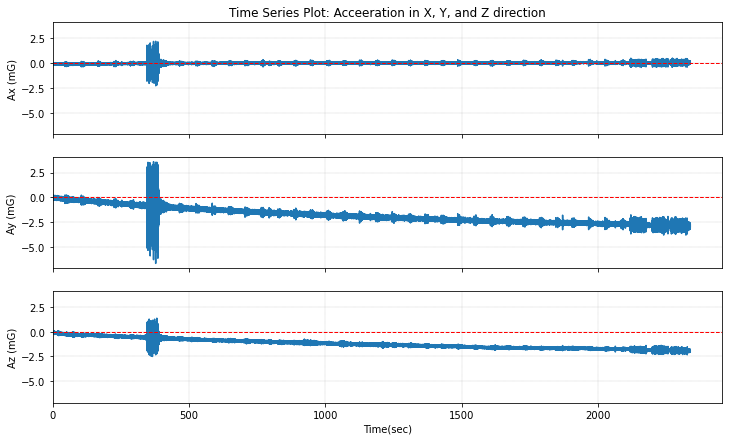

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all",sharex="all")

ax1 = sns.lineplot(data=se_df, x=se_df['time[sec]'], y=se_df["Ax"], ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
#ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.axhline(y=0, color='r', linestyle='--',linewidth=1)
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.set_xlim(xmin=0)
#ax1.set_title('Time vs. Ax')
ax1.set_title('Time Series Plot: Acceeration in X, Y, and Z direction')

ax2=sns.lineplot(data=se_df, x=se_df['time[sec]'], y=se_df["Ay"],ax=ax2)
ax2.set(ylabel="Ay (mG)")
#ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
#ax2.set_title('Time vs. Ay')

ax3=sns.lineplot(data=se_df, x=se_df['time[sec]'], y=se_df["Az"],ax=ax3)
ax3.set(xlabel='Time(sec)', ylabel="Az (mG)")
ax3.axhline(y=0, color='r', linestyle='--',linewidth=1)
#ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
#ax3.set_title('Time vs. Az')

plt.show()

#fig.savefig('TSPAXYZ.png')

## Acceleration Data in X, Y, and Z direction for [350 sec - 434 sec] Timeframe

In [8]:
se_df_350_434 = se_df.set_index('time[sec]')
se_df_350_434= se_df_350_434.loc[350:434]
se_df_350_434['time[sec]'] = se_df_350_434.index
se_df_350_434.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
350.000   -0.622392 -2.047062 -0.534237  1001.984582   14.38867    350.000
350.002    0.043750 -0.687063 -0.517130  1002.694813   14.38867    350.002
350.004    0.483215  0.614405 -0.570357  1003.178815   14.38867    350.004
350.006    0.217855 -0.373661 -0.867069  1002.882169   14.38965    350.006
350.008   -0.377238 -2.541065 -0.962615  1002.217331   14.38965    350.008

## Subplots for [Ax, Ay, Az] for Timeframe [350 sec - 434 sec] 

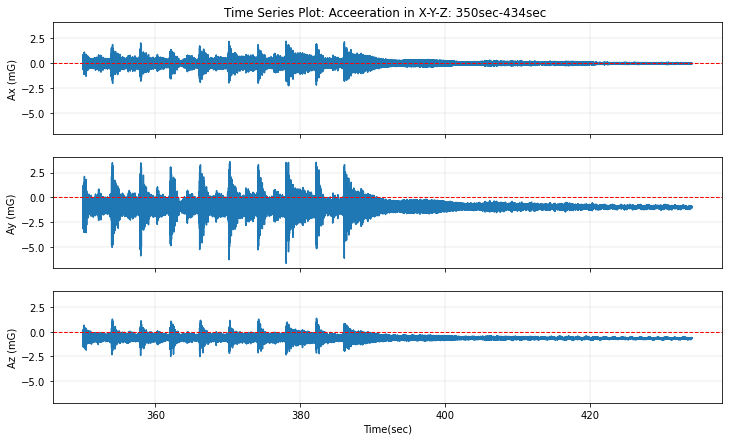

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all",sharex="all")

ax1=sns.lineplot(data=se_df_350_434, x=se_df_350_434['time[sec]'], y=se_df_350_434["Ax"],ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.axhline(linewidth=1, color='r',linestyle='--')
ax1.set_title('Time Series Plot: Acceeration in X-Y-Z: 350sec-434sec ')

ax2=sns.lineplot(data=se_df_350_434, x=se_df_350_434['time[sec]'], y=se_df_350_434["Ay"],ax=ax2)
ax2.set(xlabel=None, ylabel="Ay (mG)")
ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax2.axhline(linewidth=1, color='r',linestyle='--')
#ax2.set_title('Time vs. Ay');

ax3=sns.lineplot(data=se_df_350_434, x=se_df_350_434['time[sec]'], y=se_df_350_434["Az"],ax=ax3)
ax3.set(xlabel='Time(sec)', ylabel="Az (mG)")
ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax3.axhline(linewidth=1, color='r',linestyle='--');
#ax3.set_title('Time vs. Az');

#fig.savefig('TSPAXYZ-350-434.png')

In [10]:
sampling_rate = 500
ps_x,fs_x = plt.psd(se_df_350_434['Ax'], Fs=500,detrend='linear');
ps_y,fs_y = plt.psd(se_df_350_434['Ay'], Fs=sampling_rate,detrend='linear');
ps_z,fs_z = plt.psd(se_df_350_434['Az'], Fs=sampling_rate,detrend='linear');
plt.clf();

<Figure size 432x288 with 0 Axes>

# Ax [Acc vs Time | Spectrogram | Power vs Frequency]

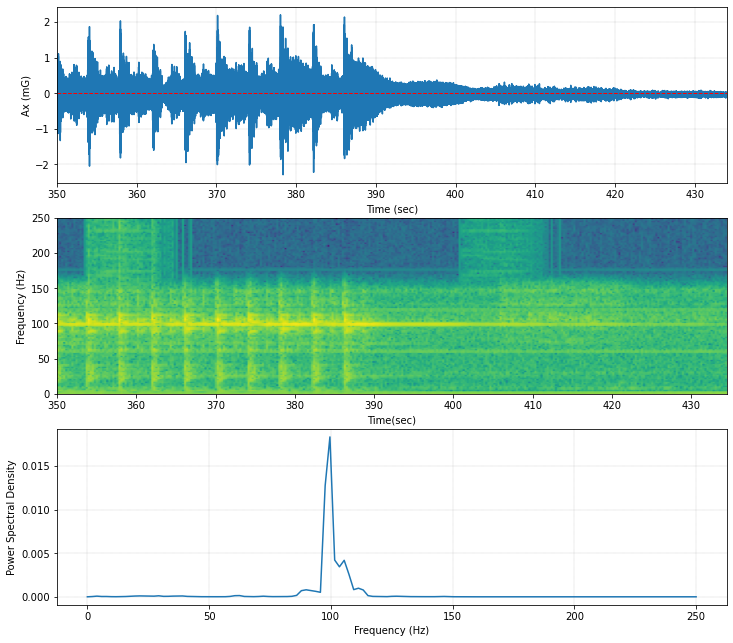

In [11]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate=500
axs[0].plot(se_df_350_434['time[sec]'],se_df_350_434["Ax"]);
axs[0].set_xlim(min(se_df_350_434['time[sec]']),max(se_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].set(xlabel='Time (sec)', ylabel="Ax (mG)")
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(se_df_350_434["Ax"],Fs=500,xextent=(350, 434.44))
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)");

axs[2].plot(fs_x, ps_x)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Ax-TS-F-PSD.png')

# Ay [Acceleration vs Time | Spectrogram | Power vs Frequency]

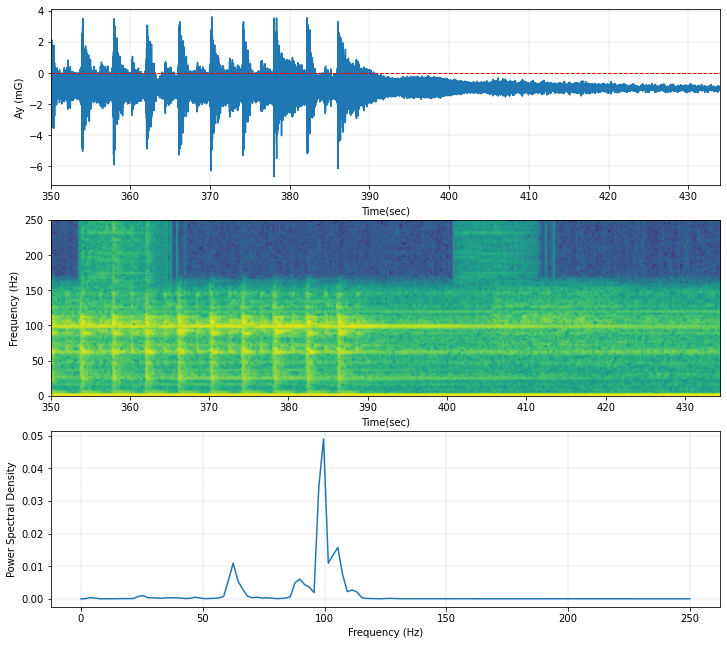

In [12]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate = 500
axs[0].plot(se_df_350_434['time[sec]'],se_df_350_434["Ay"]);
axs[0].set(xlabel='Time(sec)', ylabel="Ay (mG)")
axs[0].set_xlim(min(se_df_350_434['time[sec]']),max(se_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(se_df_350_434["Ay"],Fs=sampling_rate,xextent=(350, 434.44))
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)")

axs[2].plot(fs_y, ps_y)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Ay-TS-F-PSD.png')

# Az [Acceleration vs Time | Spectrogram | Power vs Frequency]

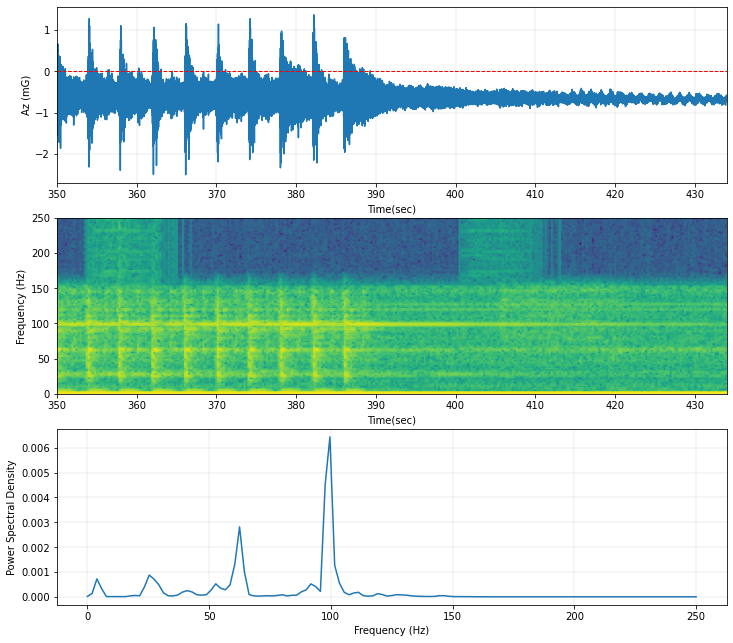

In [13]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate = 500
axs[0].plot(se_df_350_434['time[sec]'],se_df_350_434["Az"]);
axs[0].set_xlim(min(se_df_350_434['time[sec]']),max(se_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].set(xlabel='Time(sec)', ylabel='Az (mG)')
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(se_df_350_434["Az"],Fs=500,xextent=(350, 434));
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)");

axs[2].plot(fs_z, ps_z)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Az-TS-F-PSD.png')

# Power Spectral Density Ax-Ay-Az plotted together

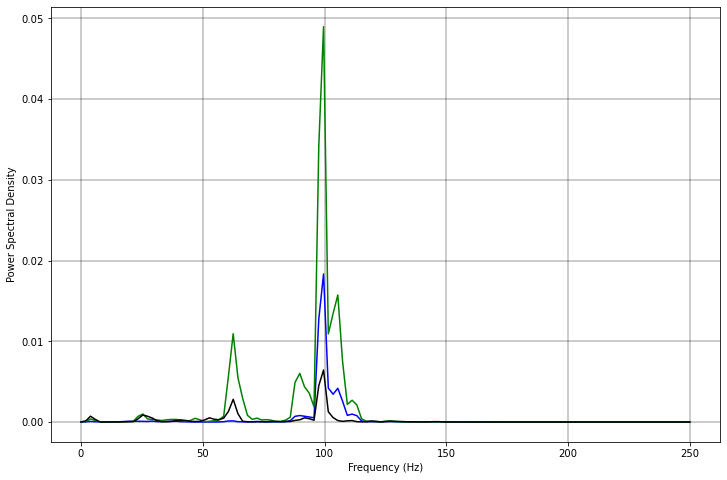

In [14]:
plt.figure(figsize=(12,8))
plt.plot(fs_x,ps_x,color = 'b',label='Ax')
plt.plot(fs_y,ps_y,color = 'g',label='Ay')
plt.plot(fs_z,ps_z,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.grid(which='major',linestyle='-', linewidth='0.4', color='black')

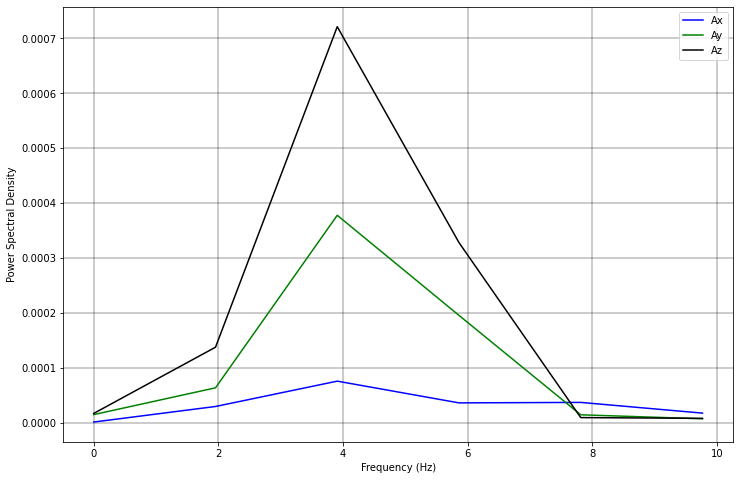

In [15]:
plt.figure(figsize=(12,8))
plt.plot(fs_x[0:6],ps_x[0:6],color = 'b',label='Ax')
plt.plot(fs_y[0:6],ps_y[0:6],color = 'g',label='Ay')
plt.plot(fs_z[0:6],ps_z[0:6],color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.grid(which='major',linestyle='-', linewidth='0.4', color='black')
plt.legend();

# Subplots [Ax, Ay, Az] for Time Frame [360 sec - 362 sec]

In [16]:
se_fp = se_df.set_index('time[sec]')
se_fp= se_fp.loc[360:362]
se_fp['time[sec]'] = se_fp.index
se_fp.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
360.000    0.452340 -0.087619 -0.988663  1003.127217   14.39063    360.000
360.002    0.208140 -0.755846 -0.853360  1002.859512   14.39063    360.002
360.004   -0.260114 -1.496971 -0.502289  1002.364228   14.39063    360.004
360.006   -0.347197 -1.276970 -0.310183  1002.282912   14.38965    360.006
360.008    0.077903 -0.494301 -0.475884  1002.735091   14.38965    360.008

**Comment:** The plot below also show the LowPass filter at **4 Hz**

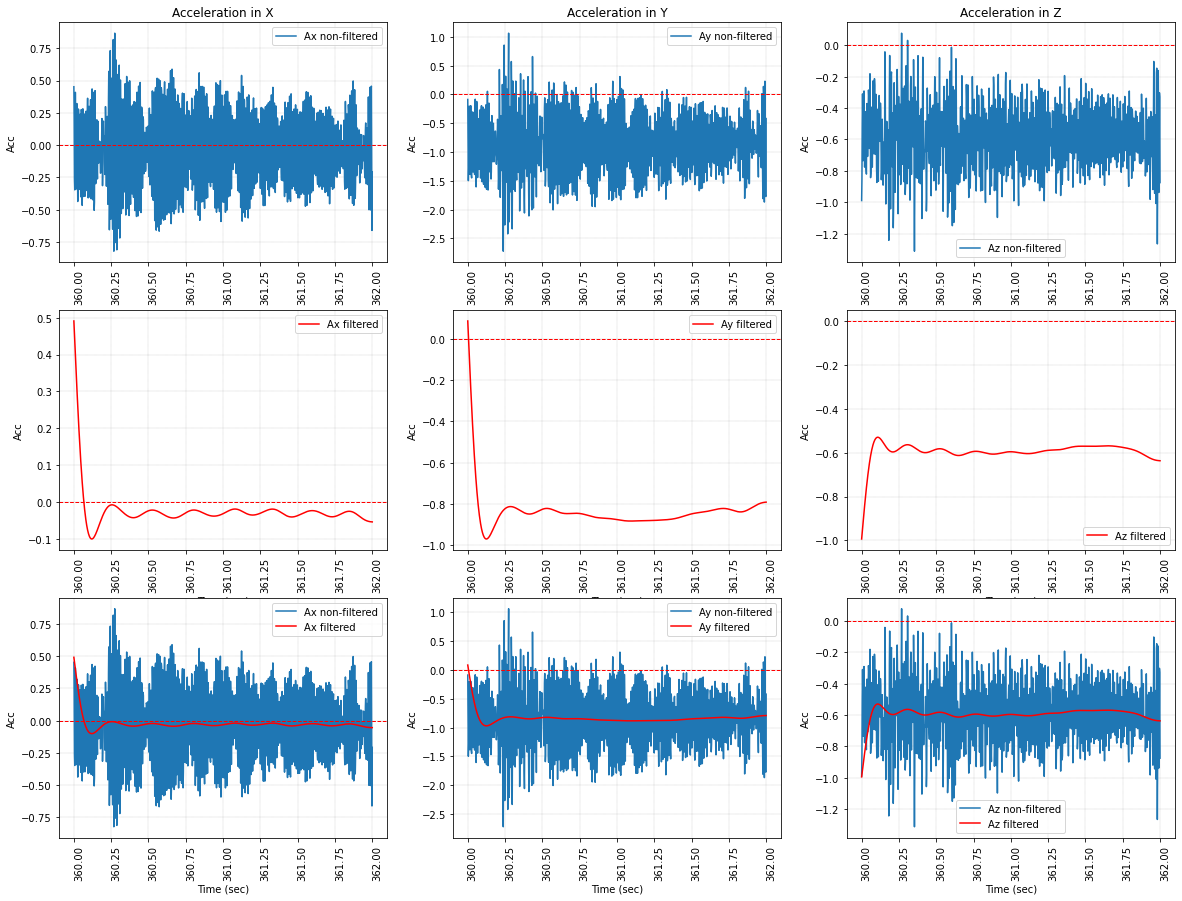

In [17]:
#### Create a filtering function

import numpy as np
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(se_fp['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(se_fp['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(se_fp['Az'], cutoff, fs, order)




fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(se_fp['time[sec]'].values, se_fp["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(se_fp['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(se_fp['time[sec]'].values, se_fp["Ax"],label='Ax non-filtered')
ax[2,0].plot(se_fp['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(se_fp['time[sec]'].values, se_fp["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(se_fp['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(se_fp['time[sec]'].values, se_fp["Ay"],label='Ay non-filtered')
ax[2,1].plot(se_fp['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(se_fp['time[sec]'].values, se_fp["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(se_fp['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(se_fp['time[sec]'].values, se_fp["Az"],label='Az non-filtered')
ax[2,2].plot(se_fp['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()
        
#fig.savefig("FR-unf-and-f-plot.jpg")

In [18]:
Ax_data_filtered = butter_lowpass_filter(se_fp['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(se_fp['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(se_fp['Az'], cutoff, fs, order)

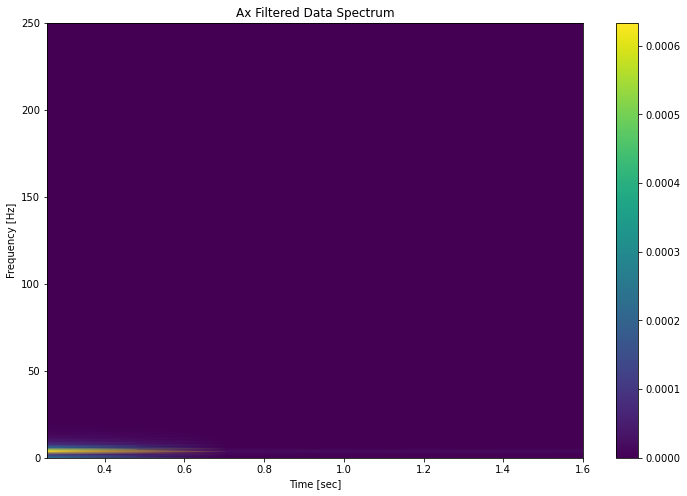

In [19]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

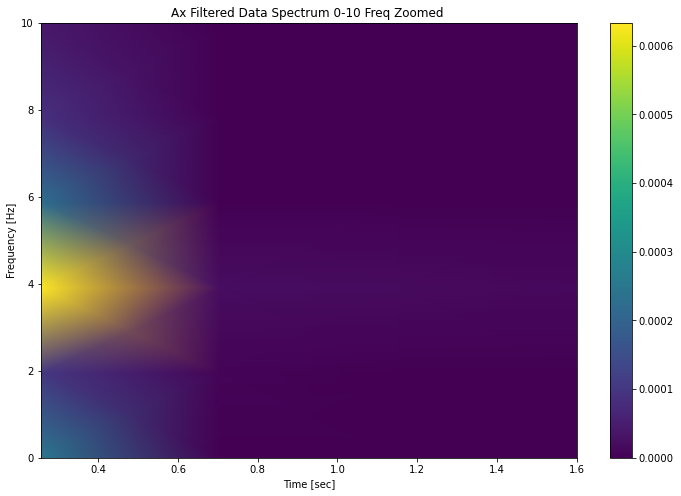

In [20]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,10))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum 0-10 Freq Zoomed ')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

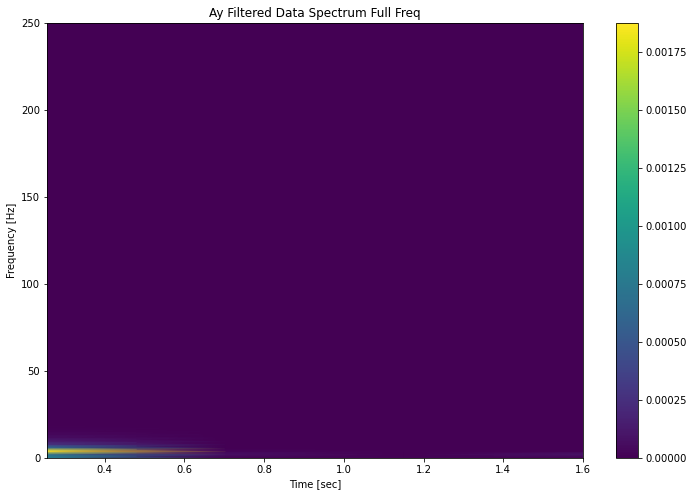

In [21]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum Full Freq')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

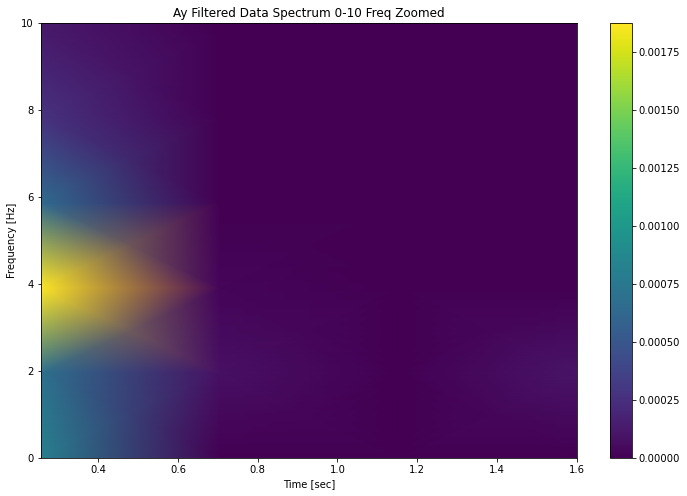

In [22]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,10))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum 0-10 Freq Zoomed')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

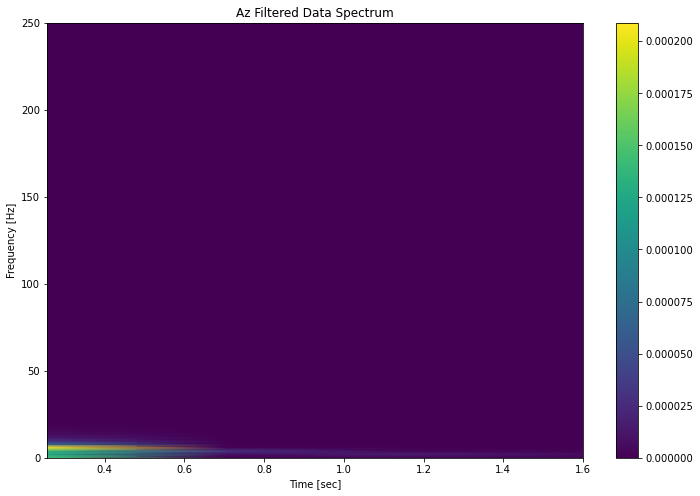

In [23]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

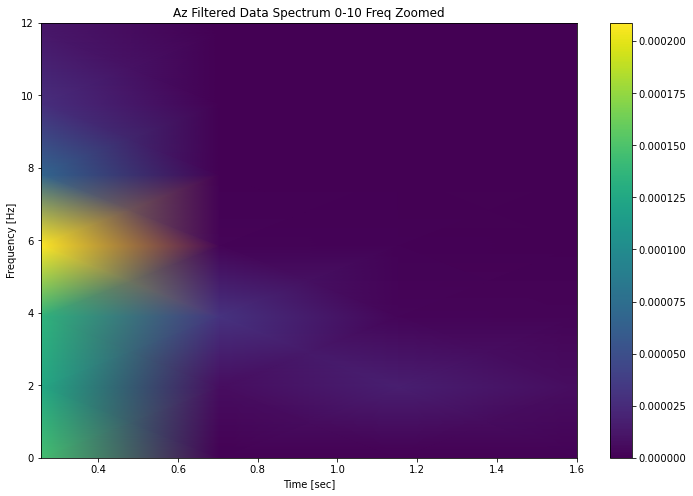

In [24]:
plt.figure(figsize=(12,8))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum 0-10 Freq Zoomed')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [25]:
plt.figure(figsize=(12,8))
psx_f,fsx_f = plt.psd(Ax_data_filtered, Fs=sampling_rate,detrend='linear');
psy_f,fsy_f = plt.psd(Ay_data_filtered, Fs=sampling_rate,detrend='linear');
psz_f,fsz_f = plt.psd(Az_data_filtered, Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 864x576 with 0 Axes>

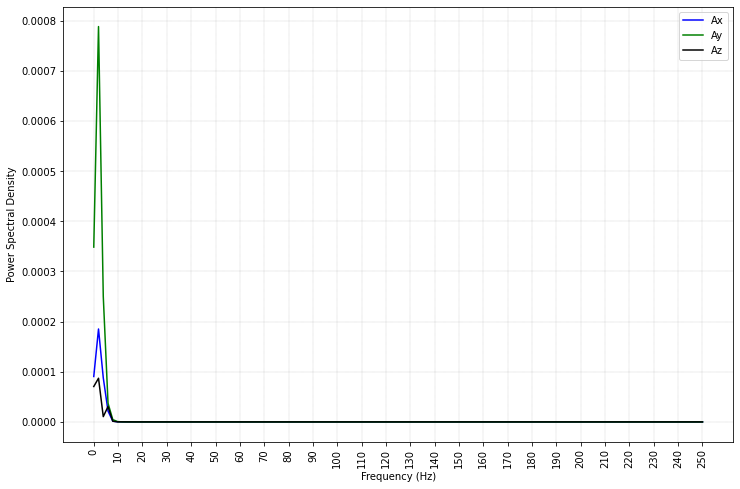

In [26]:
plt.figure(figsize=(12,8))
plt.plot(fsx_f,psx_f,color = 'b',label='Ax')
plt.plot(fsy_f,psy_f,color = 'g',label='Ay')
plt.plot(fsz_f,psz_f,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.xticks(np.arange(min(fsz_f), max(fsz_f)+1, 10))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

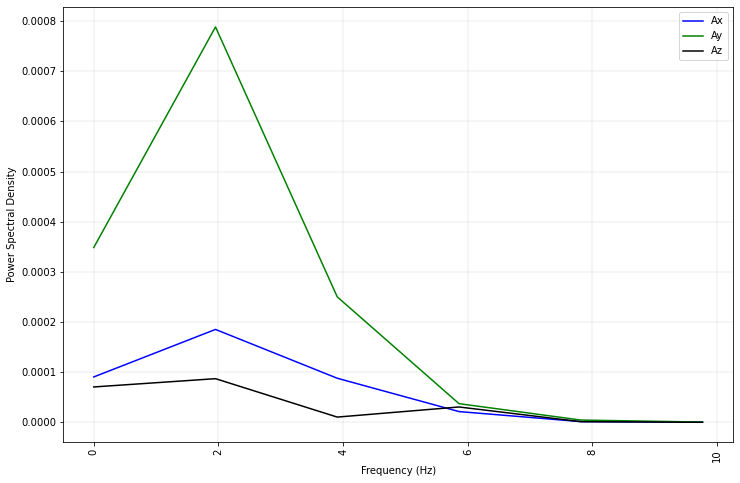

In [27]:
plt.figure(figsize=(12,8))
plt.plot(fsx_f[0:6],psx_f[0:6],color = 'b',label='Ax')
plt.plot(fsy_f[0:6],psy_f[0:6],color = 'g',label='Ay')
plt.plot(fsz_f[0:6],psz_f[0:6],color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
#plt.xticks(np.arange(0, 6, .1))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

# After Bell Ring Analysis

We explore the vibration of the structure when the bell stop rigging. The time span taken is between 750 second and 1250 sec. We consequently generate the follwing plots:

In [28]:
se_after_rings = se_df.set_index('time[sec]')
se_after_rings= se_after_rings.loc[500:]
se_after_rings['time[sec]'] = se_after_rings.index
se_after_rings.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
500.000   -0.047445 -1.194537 -0.698746  1002.588265   14.54785    500.000
500.002   -0.012874 -1.074672 -0.695169  1002.626745   14.54785    500.002
500.004    0.007332 -0.980914 -0.734508  1002.650362   14.54785    500.004
500.006   -0.037968 -1.022518 -0.765860  1002.603964   14.54785    500.006
500.008   -0.087201 -1.146793 -0.788808  1002.550836   14.54785    500.008

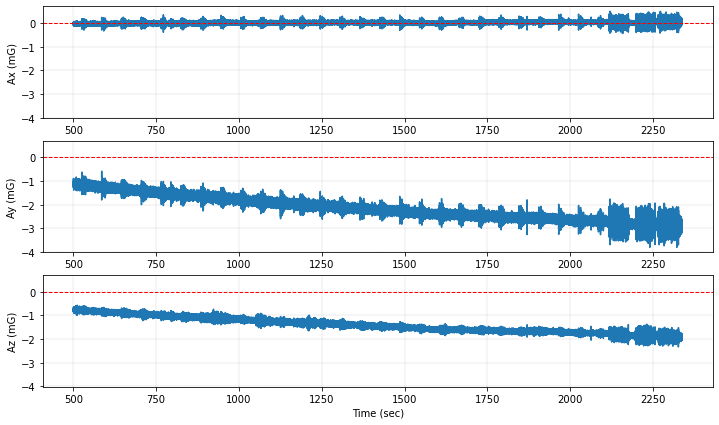

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all")
df =se_after_rings
ax1=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ax"],ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.axhline(linewidth=1, color='r',linestyle='--')
#ax1.set_title('Time vs. Ax')

ax2=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ay"],ax=ax2)
ax2.set(xlabel=None, ylabel="Ay (mG)")
ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax2.axhline(linewidth=1, color='r',linestyle='--')
#ax2.set_title('Time vs. Ay');

ax3=sns.lineplot(data=df, x=df['time[sec]'], y=df["Az"],ax=ax3)
ax3.set(xlabel='Time (sec)', ylabel="Az (mG)")
ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax3.axhline(linewidth=1, color='r',linestyle='--');
#ax3.set_title('Time vs. Az');

#fig.savefig("ABR.jpg")

In [30]:
df =se_after_rings
psx,fsx = plt.psd(df['Ax'], Fs=sampling_rate,detrend='linear');
psy,fsy = plt.psd(df['Ay'], Fs=sampling_rate,detrend='linear');
psz,fsz = plt.psd(df['Az'], Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 432x288 with 0 Axes>

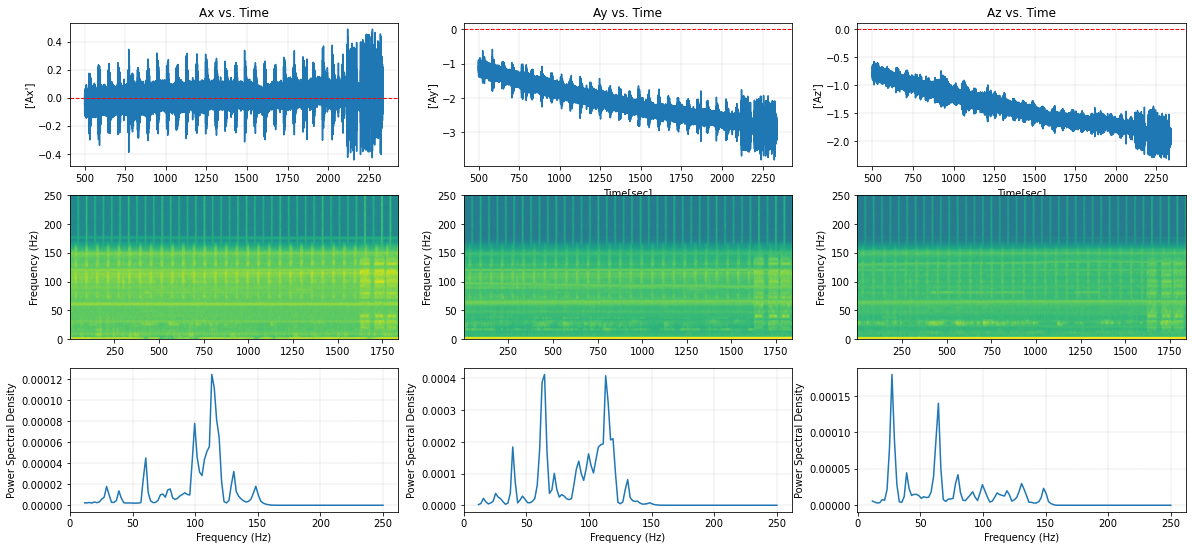

In [31]:
fig, ax = plt.subplots(3,3,figsize=(20, 9))


ax[0,0]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ax"],ax=ax[0,0])
ax[0,0].set(ylabel=["Ax"], xlabel=None)
ax[0,0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,0].axhline(linewidth=1, color='r',linestyle='--')
ax[0,0].set_title('Ax vs. Time')

ax[1,0].specgram(df["Ax"],Fs=sampling_rate);
ax[1,0].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,0].plot(fsx[6:],psx[6:])
ax[2,0].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,0].grid(which='major',linestyle='--', linewidth='0.1', color='black')


ax[0,1]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ay"],ax=ax[0,1])
ax[0,1].set(xlabel='Time[sec]', ylabel=["Ay"])
ax[0,1].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,1].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,1].axhline(linewidth=1, color='r',linestyle='--')
ax[0,1].set_title('Ay vs. Time');

ax[1,1].specgram(df["Ay"],Fs=sampling_rate);
ax[1,1].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,1].plot(fsy[6:],psy[6:]);
ax[2,1].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,1].grid(which='major',linestyle='--', linewidth='0.1', color='black')



ax[0,2]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Az"],ax=ax[0,2])
ax[0,2].set(xlabel='Time[sec]', ylabel=["Az"])
ax[0,2].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,2].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,2].axhline(linewidth=1, color='r',linestyle='--')
ax[0,2].set_title('Az vs. Time')


ax[1,2].specgram(df["Az"],Fs=sampling_rate);
ax[1,2].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,2].plot(fsz[6:],psz[6:]);
ax[2,2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,2].grid(which='major',linestyle='--', linewidth='0.1', color='black')


#fig.savefig("ABR-TS-F-PSD.jpg")

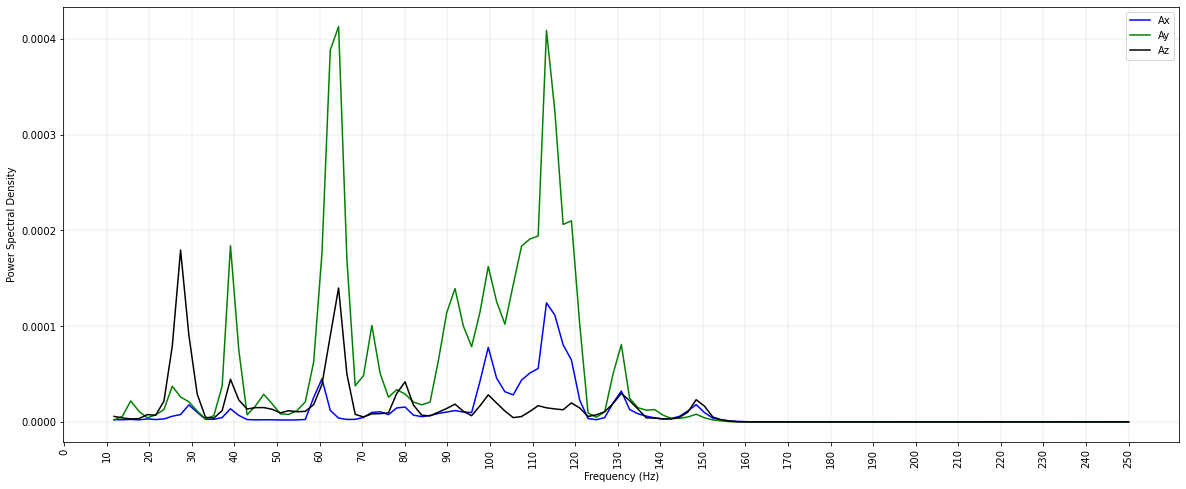

In [32]:
plt.figure(figsize=(20,8))
plt.plot(fsx[6:],psx[6:],color = 'b',label='Ax')
plt.plot(fsy[6:],psy[6:],color = 'g',label='Ay')
plt.plot(fsz[6:],psz[6:],color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.xticks(np.arange(min(fsz), max(fsz)+1, 10))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

<h1>After Bell Ring Analysis -- Filtered </h1>

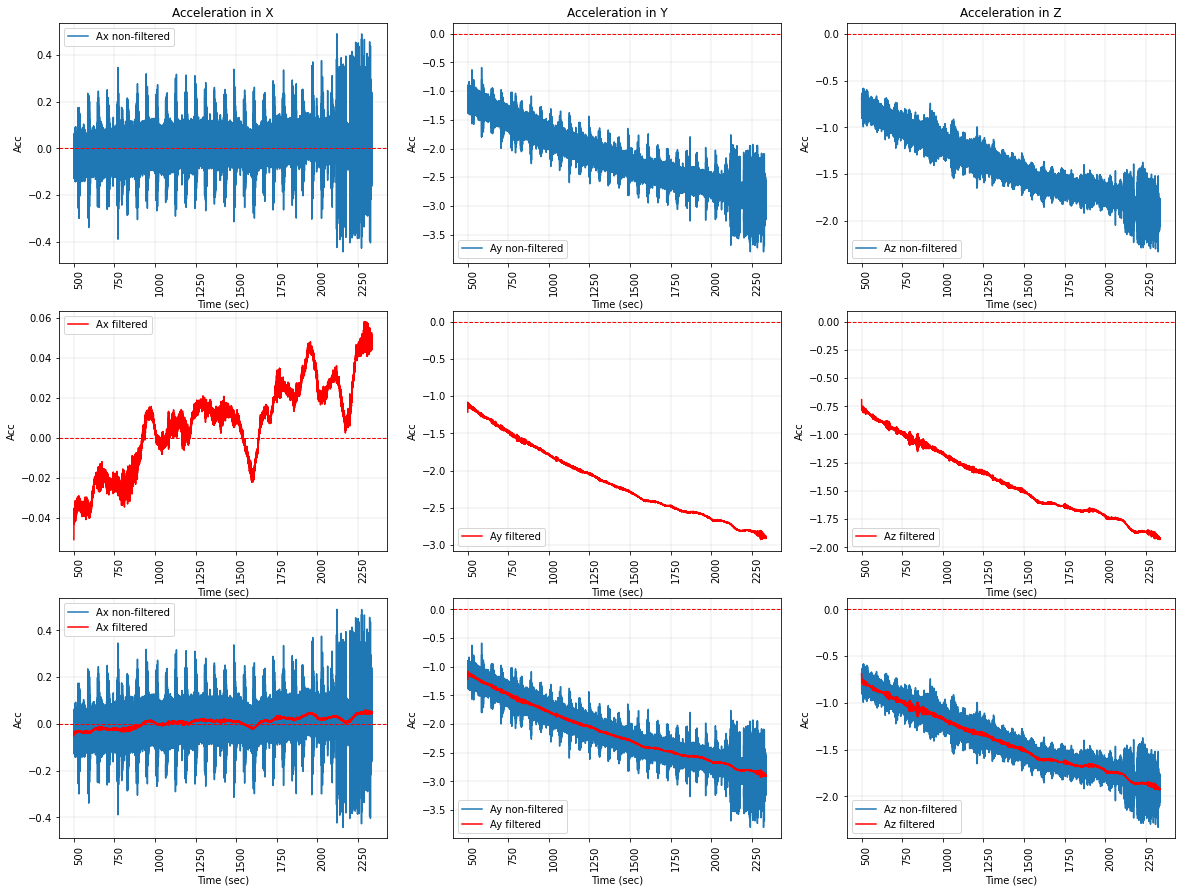

In [33]:
fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(df['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(df['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(df['Az'], cutoff, fs, order)


fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(df['time[sec]'].values, df["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(df['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(df['time[sec]'].values, df["Ax"],label='Ax non-filtered')
ax[2,0].plot(df['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(df['time[sec]'].values, df["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(df['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(df['time[sec]'].values, df["Ay"],label='Ay non-filtered')
ax[2,1].plot(df['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(df['time[sec]'].values, df["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(df['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(df['time[sec]'].values, df["Az"],label='Az non-filtered')
ax[2,2].plot(df['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()

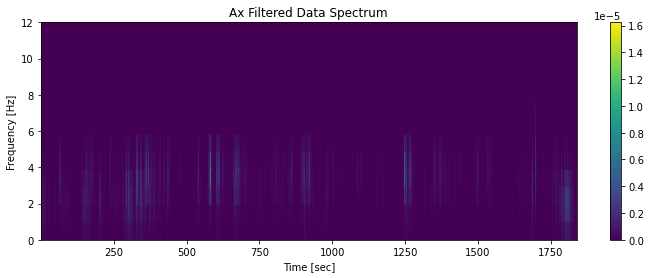

In [34]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

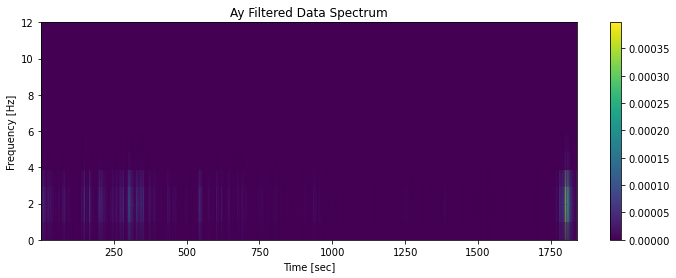

In [35]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

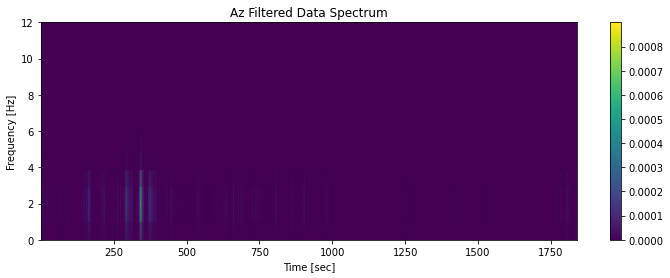

In [36]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<h1> After ring - 10 sec - between 1000 sec to 1010 sec </h1>

In [37]:
se_after_rings_short = se_df.set_index('time[sec]')
se_after_rings_short= se_after_rings_short.loc[1000:1010]
se_after_rings_short['time[sec]'] = se_after_rings_short.index
se_after_rings_short.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
1000.000   0.008941 -1.731992 -1.129985  1002.630618   14.79688   1000.000
1000.002   0.012696 -1.792252 -1.154304  1002.632626   14.79688   1000.002
1000.004  -0.011742 -1.832366 -1.134575  1002.606736   14.79688   1000.004
1000.006  -0.018537 -1.819312 -1.178325  1002.600740   14.79688   1000.006
1000.008  -0.006377 -1.779020 -1.267612  1002.614963   14.79688   1000.008

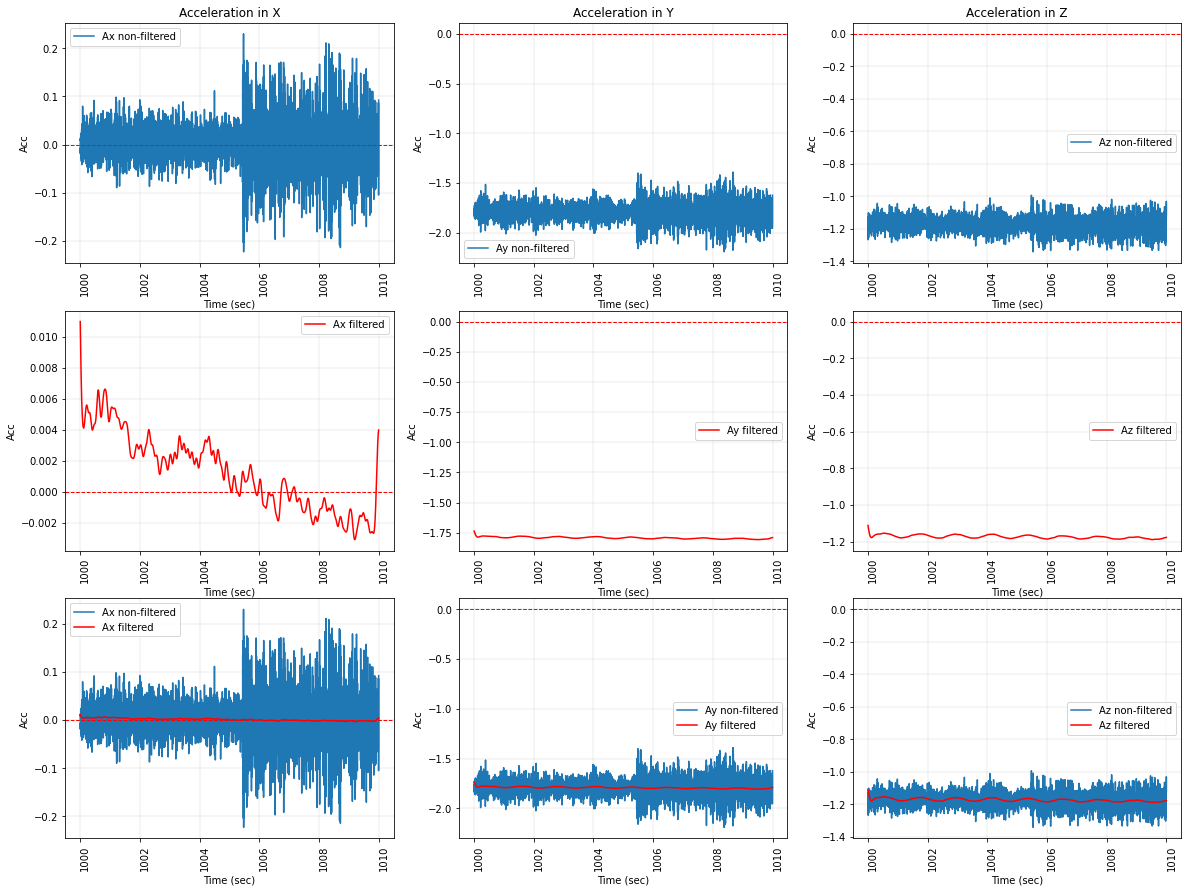

In [38]:
#### Create a filtering function

import numpy as np
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(se_after_rings_short['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(se_after_rings_short['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(se_after_rings_short['Az'], cutoff, fs, order)




fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(se_after_rings_short['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Ax"],label='Ax non-filtered')
ax[2,0].plot(se_after_rings_short['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(se_after_rings_short['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Ay"],label='Ay non-filtered')
ax[2,1].plot(se_after_rings_short['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(se_after_rings_short['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(se_after_rings_short['time[sec]'].values, se_after_rings_short["Az"],label='Az non-filtered')
ax[2,2].plot(se_after_rings_short['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()
        
#fig.savefig("FR-unf-and-f-plot.jpg")

In [39]:
Ax_data_filtered = butter_lowpass_filter(se_after_rings_short['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(se_after_rings_short['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(se_after_rings_short['Az'], cutoff, fs, order)

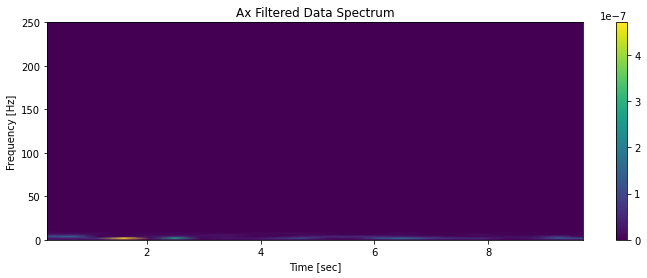

In [40]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

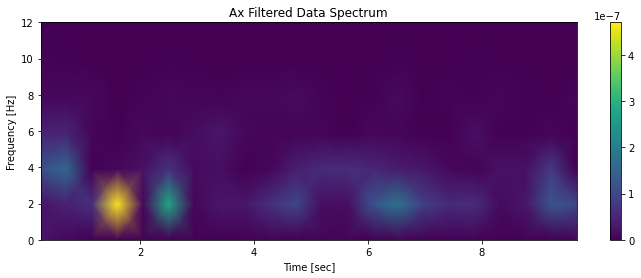

In [41]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

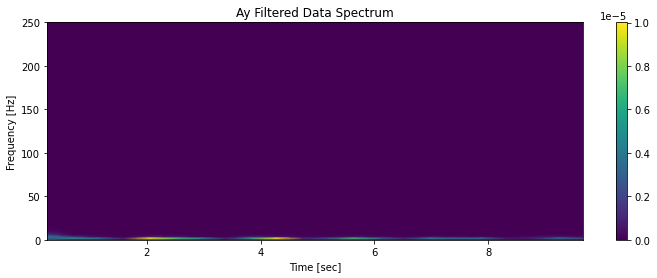

In [42]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

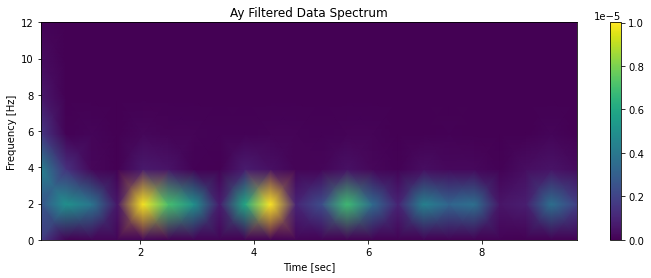

In [43]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum')
plt.ylim((0,12))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

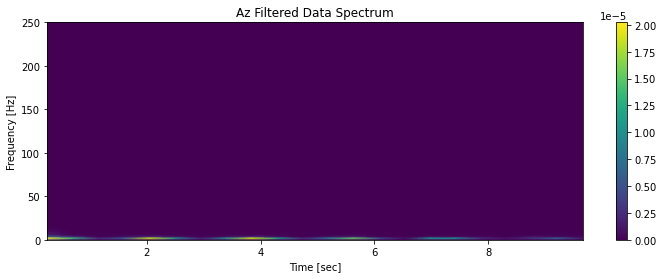

In [44]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

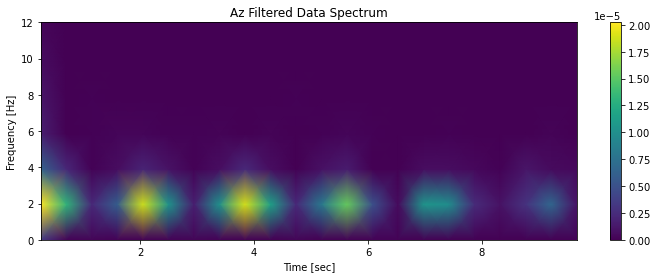

In [45]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.ylim((0,12))
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<h2>Power Density Spectrum</h2>

In [46]:
df =se_after_rings_short
psx,fsx = plt.psd(df['Ax'], Fs=sampling_rate,detrend='linear');
psy,fsy = plt.psd(df['Ay'], Fs=sampling_rate,detrend='linear');
psz,fsz = plt.psd(df['Az'], Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 432x288 with 0 Axes>

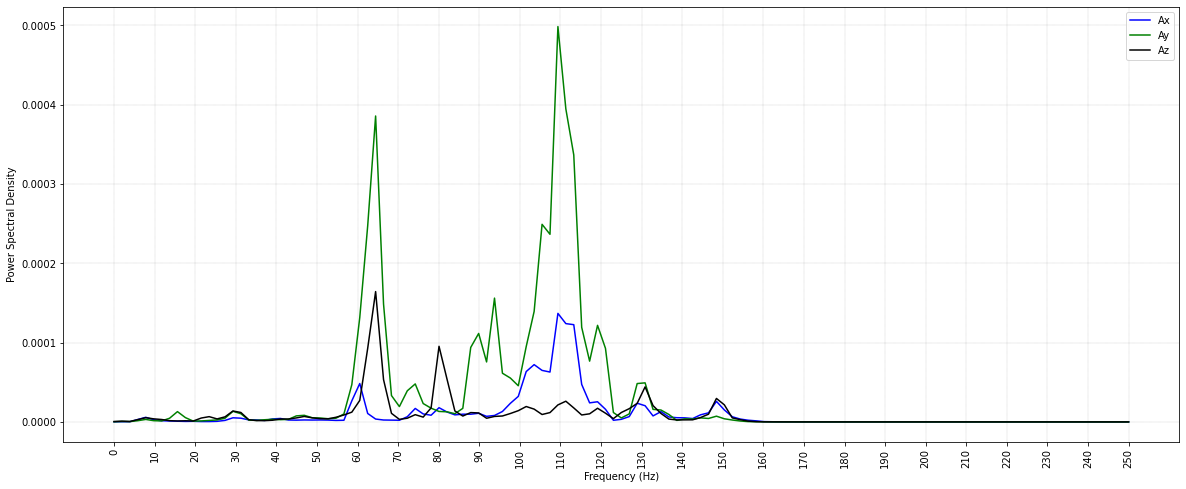

In [47]:
plt.figure(figsize=(20,8))
plt.plot(fsx,psx,color = 'b',label='Ax')
plt.plot(fsy,psy,color = 'g',label='Ay')
plt.plot(fsz,psz,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.xticks(np.arange(min(fsz), max(fsz)+1, 10))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()